In [56]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
#reading the data
loan_data = pd.read_csv("loan.csv")

In [58]:
#to display first 5 records
loan_data.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [59]:
loan_data.shape

(39717, 111)

In [60]:
# to return the number of missing values in the data set
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [61]:
#Removing columns with all null values.
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [62]:
#On observing the dataset several columns have single value across, which cannot contribute to our analysis hence removing them.
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


## As we are analyzing the user details and the driving factors of loan defaulting before approving loan.

#### There are columns which capture post approval of loan. They can be dropped too
#### List of post-approval columns/features
delinq_2yrs, revol_bal, out_prncp, total_pymnt, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, chargeoff_within_12_mths, mths_since_last_delinq, mths_since_last_record

#### Also removing columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc" as they don't contribute to the loan defaulting and hence is irrevalent features.

#### Also removing "out_prncp_inv" , "total_pymnt_inv " as they are useful for investors and not contributing to the loan defaulting analysis.

#### "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.
#### Removing "earliest_cr_line", "inq_last_6mths", "revol_util", "total_acc","open_acc","pub_rec" as they do not affect the analysis.

In [63]:
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record","earliest_cr_line", "inq_last_6mths", "revol_util","total_acc","open_acc","pub_rec" ], axis = 1, inplace = True)


In [64]:
loan_data.shape

(39717, 15)

In [65]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti'],
      dtype='object')

##### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.We cannot analyse the current loans hence removing the records with current loan status.

In [66]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [67]:
#Checking for missing values
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
dtype: float64

In [68]:
#Handling Missing values
#columns with missing values is "emp_length".
#So before doing that, lets see what kind of data each column has.
loan_data.info()
loan_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
dtypes: float64(4), int64(1), object(10)


(38577, 15)

In [69]:
# Finding the mode. 
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [70]:
# Imputing mode to the null values in the column. As the missing values are in very low percentage, imputung with mode value will not affect the analysis much
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

Standardizing the data in the following columns
"int_rate" column although described as an object column, it has continous values.
"emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }

In [71]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [72]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [73]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20


<AxesSubplot:xlabel='annual_inc'>

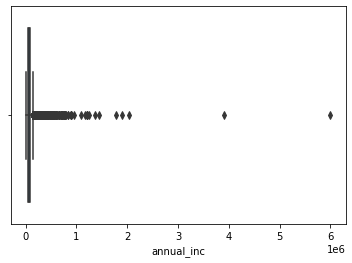

In [74]:
#Outlier Treatment
sns.boxplot(loan_data['annual_inc'])

###### As above plot is clearly indicating the presence of outliers therefore removing them. The quantile info below helps us to take an appropriate action.The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation. So, considering threshold for removing outliers as 0.95

In [75]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [76]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

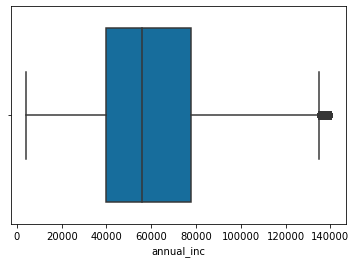

In [77]:
sns.boxplot(loan_data.annual_inc)

##### Analyzing other numerical variables which could possibly have outliers

<AxesSubplot:xlabel='dti'>

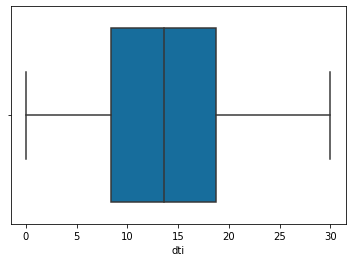

In [78]:
sns.boxplot(loan_data.dti)

<AxesSubplot:xlabel='loan_amnt'>

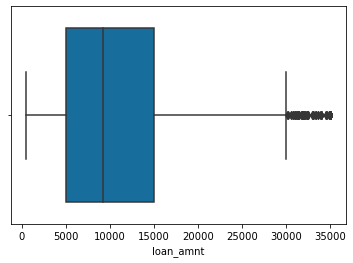

In [79]:
sns.boxplot(loan_data.loan_amnt)

In [80]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

##### Here the distribution is pretty continous and therefore their is no need to remove outliers for the above column.

### Visualizing Categorical Data
##### As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable
##### We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

<AxesSubplot:xlabel='loan_status', ylabel='count'>

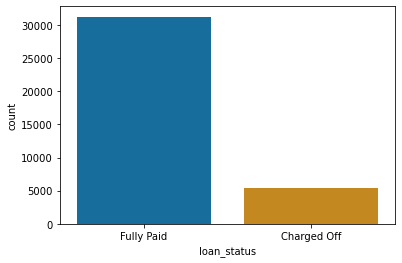

In [81]:
sns.countplot(x = 'loan_status', data = loan_data)

In [82]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

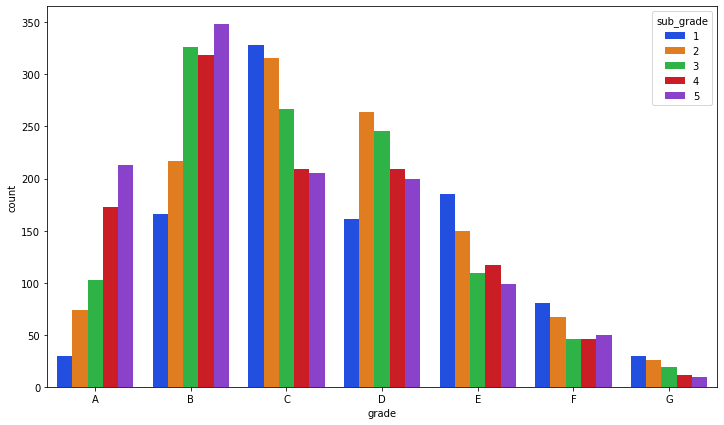

In [116]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('bright')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

#### Analysis: From the above plot, Highest defaulters are in grade B sub grade B5 

<AxesSubplot:xlabel='grade', ylabel='count'>

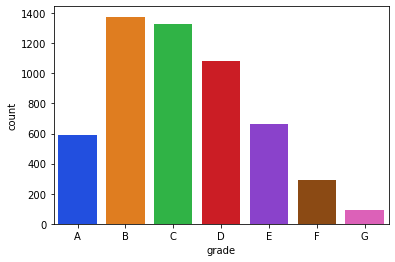

In [117]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

#### Analysis: From the above plot, Highest defaulters are in grade B 

In [118]:
#Analyzing home_ownership
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [119]:
#There are only 3 records with 'NONE' value in the data. So replacing the values with 'OTHER'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [120]:
#checking unique values for home_ownership column
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

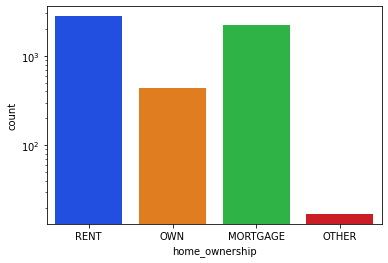

In [121]:
#Analyzing home_ownership
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analysis: From the above plot, Highest defaulters from borrowers staying in rented accomodations.

<AxesSubplot:xlabel='count', ylabel='purpose'>

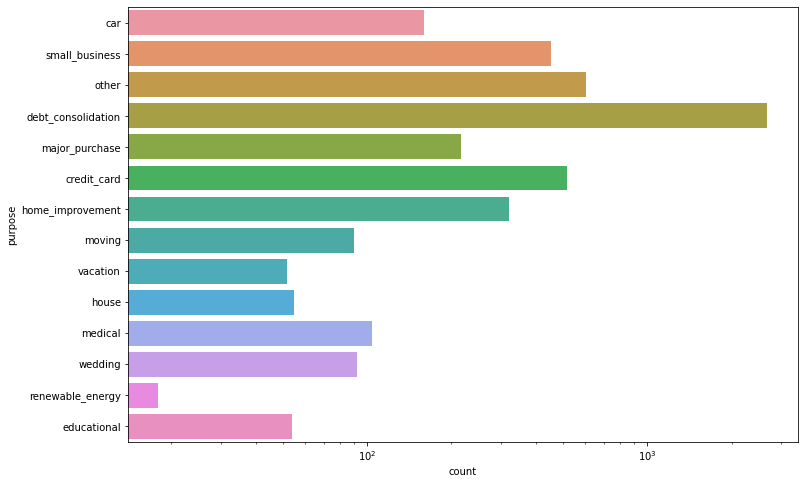

In [122]:
#Analyzing purpose
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

#### Analysis: From the above plot, highest defaulters are in debt consolidation category.

In [123]:
#Creating bins for some numerical variable, int_rate,open_acc to make them categorical
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [124]:
# Viewing new bins created
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,int_rate_groups,annual_inc_groups,issue_month,issue_year,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,credit_card,27.65,9%-13%,3k-31k,Dec,2011,145-274,0-5k,0-5k,24-30
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,car,1.00,13%-17%,3k-31k,Dec,2011,14-145,0-5k,0-5k,0-6
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,small_business,8.72,13%-17%,3k-31k,Dec,2011,14-145,0-5k,0-5k,6-12
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,other,20.00,13%-17%,31k-58k,Dec,2011,274-403,5k-10k,5k-10k,18-24
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,wedding,11.20,5%-9%,31k-58k,Dec,2011,145-274,0-5k,0-5k,6-12


<AxesSubplot:xlabel='emp_length', ylabel='count'>

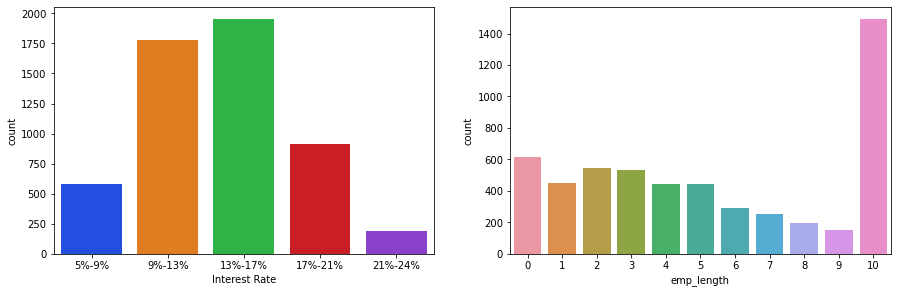

In [125]:
#Analyzing interest rate wrt the interest rate bins created
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

#### Analysis: From the above plot, highest defaulters are in the interest range of 13%-17%  and employment length of more that 10 years.

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

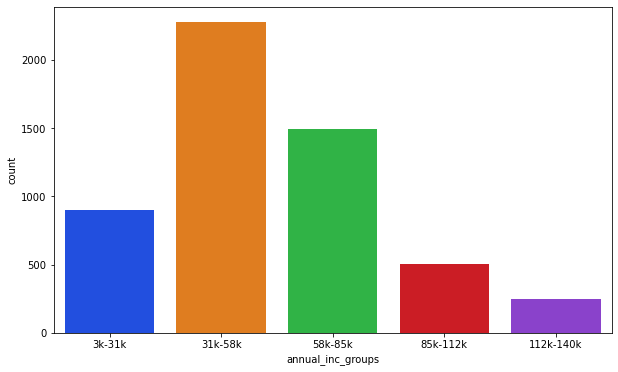

In [126]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

#### Analysis: From the above plot, highest defaulters are in 31K- 58K group.

<AxesSubplot:xlabel='term', ylabel='count'>

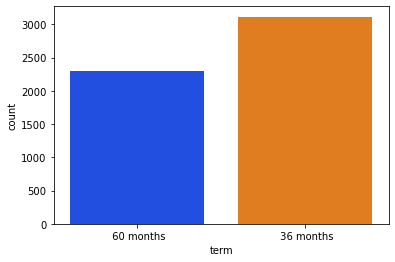

In [127]:
sns.countplot(x='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analysis: From the above plot, highest defaulters are in the term period of 36 months.

<AxesSubplot:xlabel='verification_status', ylabel='count'>

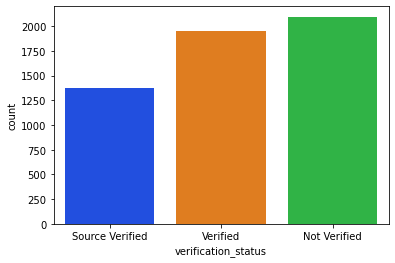

In [128]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analysis: From the above plot, highest defaulters are in the Not Verified category.

In [129]:
#Analyzing by issued month and year
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [130]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,int_rate_groups,annual_inc_groups,issue_month,issue_year,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,credit_card,27.65,9%-13%,3k-31k,Dec,2011,145-274,0-5k,0-5k,24-30
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,car,1.00,13%-17%,3k-31k,Dec,2011,14-145,0-5k,0-5k,0-6
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,small_business,8.72,13%-17%,3k-31k,Dec,2011,14-145,0-5k,0-5k,6-12
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,other,20.00,13%-17%,31k-58k,Dec,2011,274-403,5k-10k,5k-10k,18-24
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,wedding,11.20,5%-9%,31k-58k,Dec,2011,145-274,0-5k,0-5k,6-12


<AxesSubplot:xlabel='issue_year', ylabel='count'>

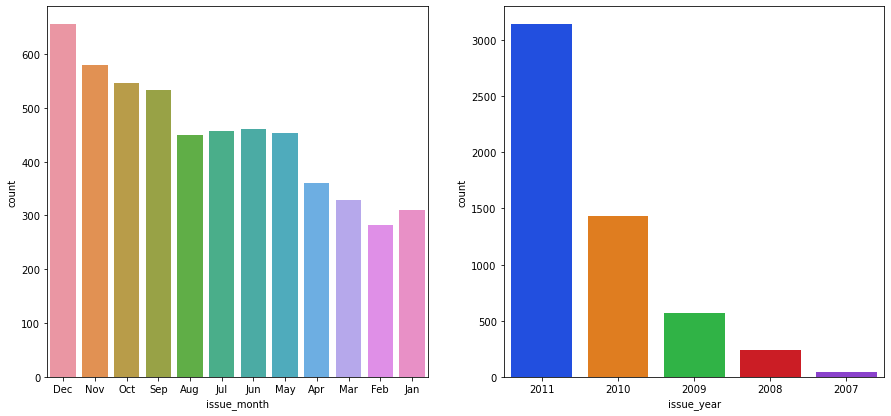

In [131]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analysis: From the above plot, highest defaulters are in the loan sanctioned/issues month of December and issue year of 2011.

In [132]:
#Analyzing installment,dti,loan_amnt
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

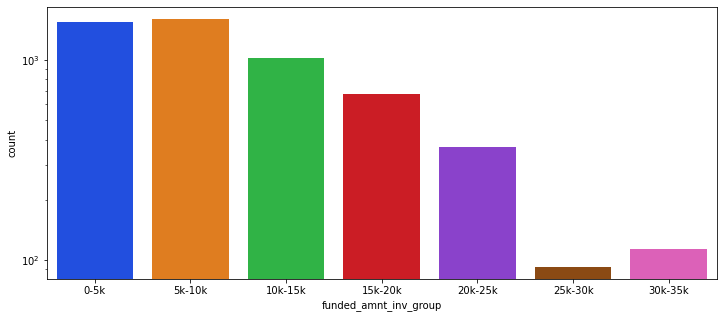

In [133]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analysis: From the above plot, highest defaulters are in the 5k-10k range of the total amount funded by investors.

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

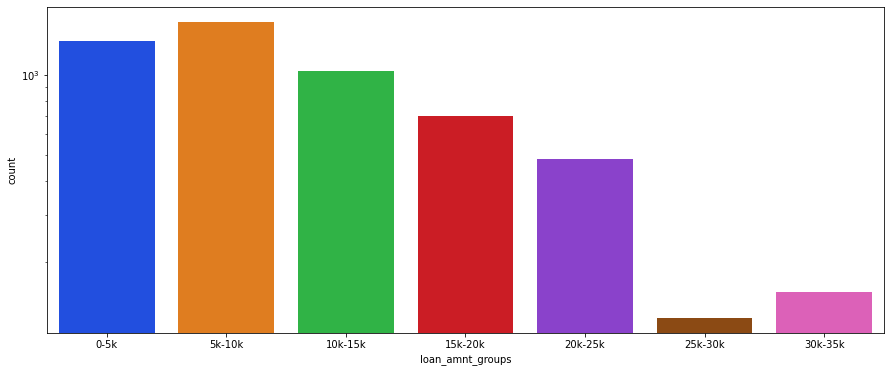

In [134]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analysis: From the above plot, highest defaulters are in the 5k-10k range of the loan amount groups.

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

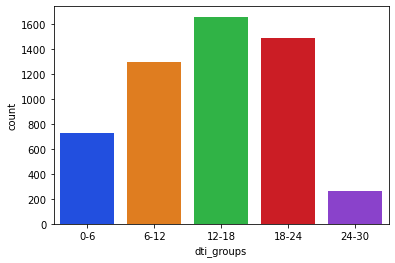

In [135]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analysis: From the above plot, highest defaulters are in the 12-18 range.

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

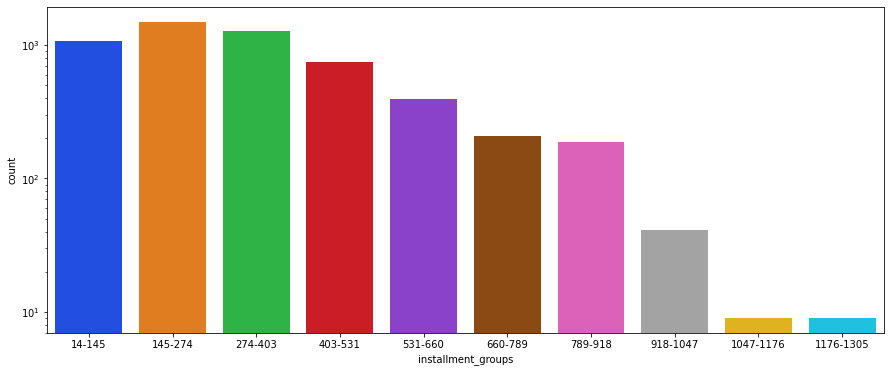

In [136]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

#### Analysis: From the above plot, highest defaulters are in the 145-274 range.

### Observations
##### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :

* Highest defaulters are in grade B sub grade B5
* Highest defaulters are in grade B    
* Highest defaulters from borrowers staying in rented accomodations.
* Highest defaulters are in debt consolidation category/loan to clear other debts.
* Highest defaulters are in the interest at the rate of 13%-17% and employment length of more that 10 years.    
* Highest defaulters are in 31K- 58K group.    
* Highest defaulters are in the term period of 36 months.
* Highest defaulters are in the loan status- Not Verified category.
* Highest defaulters are in the loan sanctioned/issues month of December and issue year of 2011.The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)
* Highest defaulters are in the 5k-10k range- When funded amount by investor is between 5000-10000.   
* Highest defaulters are in the 5k-10k range of the loan amount groups.
* Highest defaulters are in the 12-18 range for DTI.    
* Highest defaulters are in the 145-274 monthly installments range.    
    

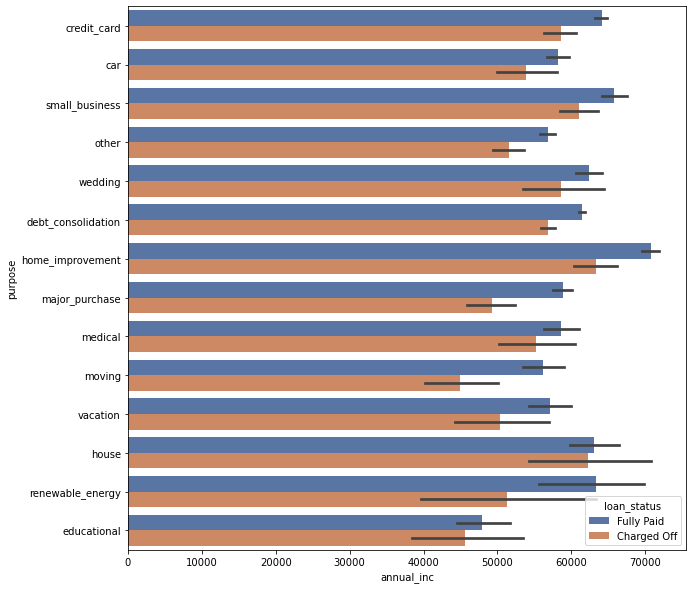

In [137]:
#Analysing annual income with other columns for more insights
#1.Annual income vs loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### Analysis:Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses". Applicants taking loan for 'home improvement' and have income of 60k -70k

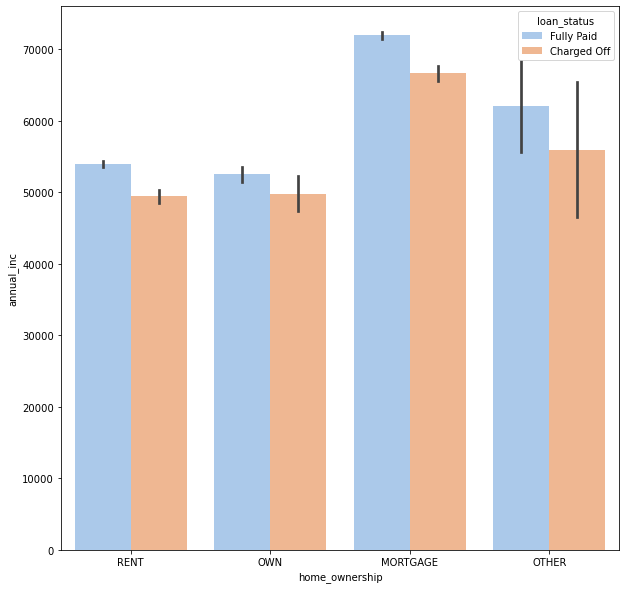

In [138]:
#2.Annual income vs home ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Analysis: Defaulters are the applicants whose home ownership is 'MORTGAGE' and have income of 60-70k

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

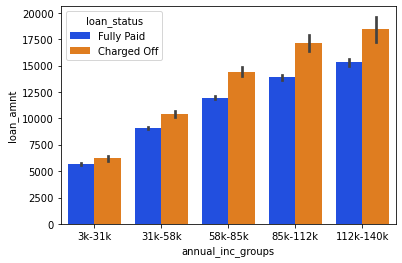

In [139]:
#Annual Income vs Loan amount
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)

#### Across all the income groups, the loan_amount is higher for people who defaulted.

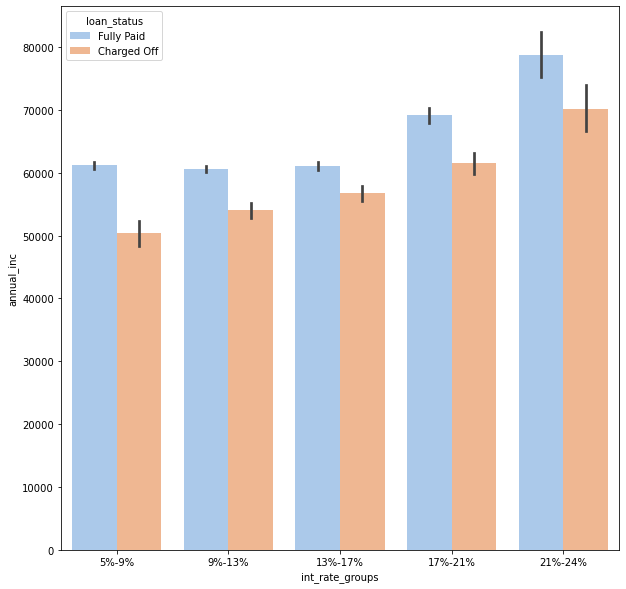

In [140]:
#3. Annual income vs int_rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Analysis: Defaulters are applicants who receive interest at the rate of 21-24% and have an income of 70k-80k. 

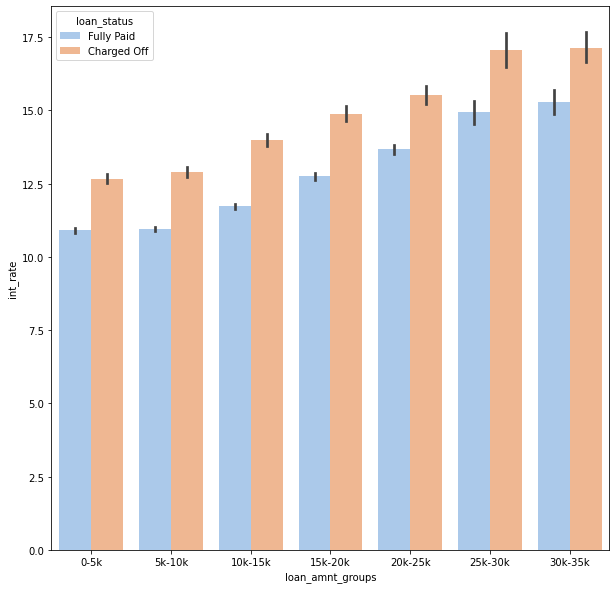

In [141]:
#1.Loan Amount vs Interest Rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### Analysis: Defaulters are applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %

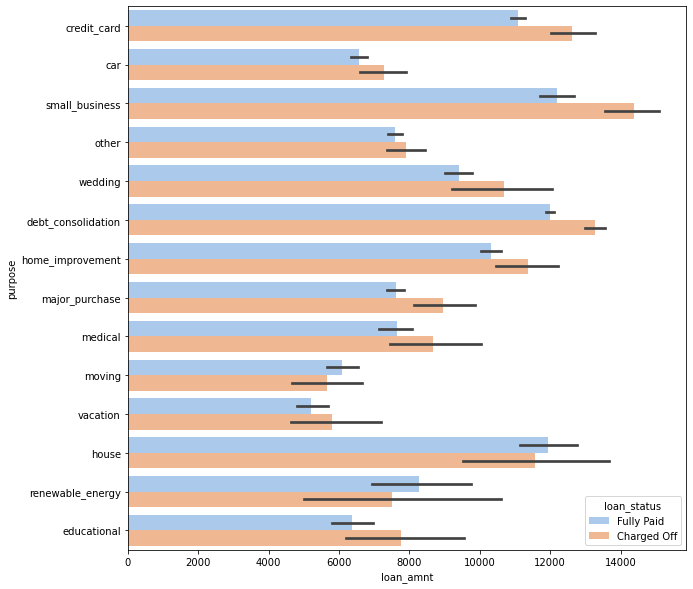

In [142]:
#2.Loan vs Loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Analysis: Defaulters are applicants who have taken a loan for small business and the loan amount is greater than 14k

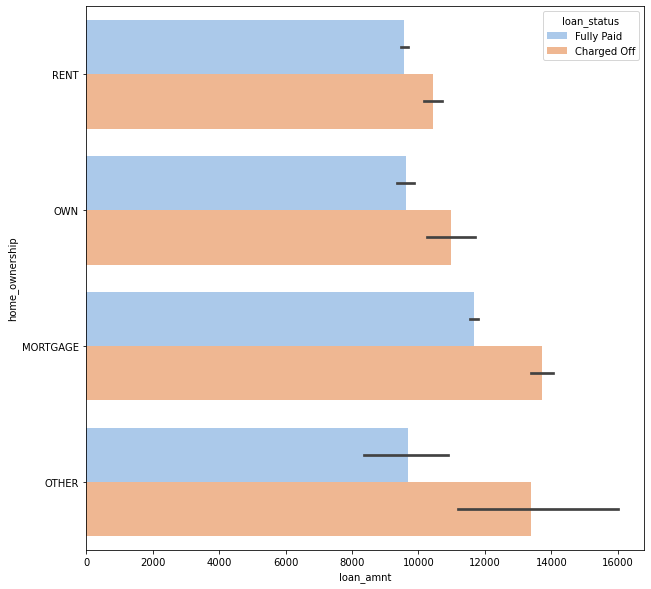

In [143]:
#3.Loan vs House Ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

####  Analysis: Defaulters are applicants whose home ownership is 'MORTGAGE and have loan of 14-16k

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

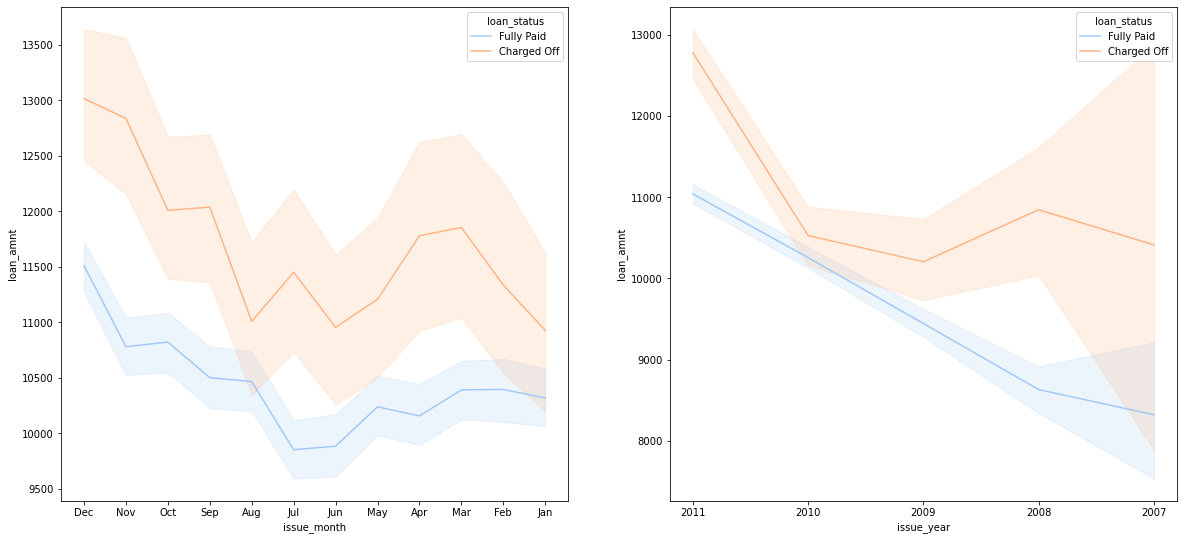

In [144]:
#4.Loan amount vs month issued and year issued
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

#### Analysis: Defaulters are when issue month is Dec and issue year is 2011

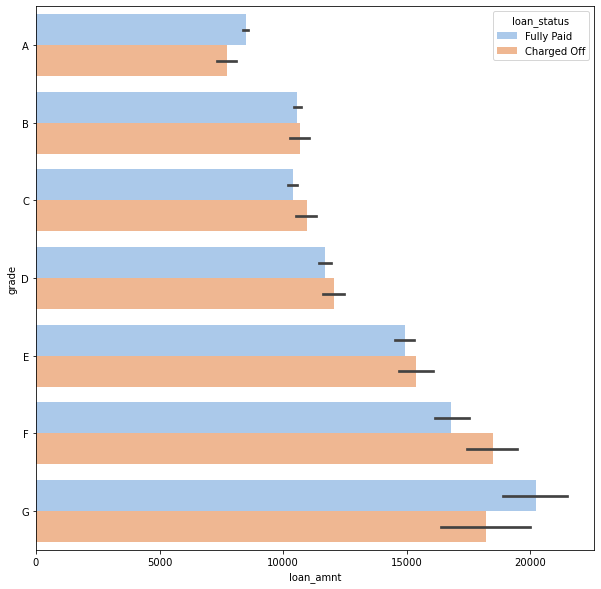

In [145]:
#5.Loan amount vs Grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

#### Analysis: Defaulters are when grade is F and loan amount is between 15k-20k

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

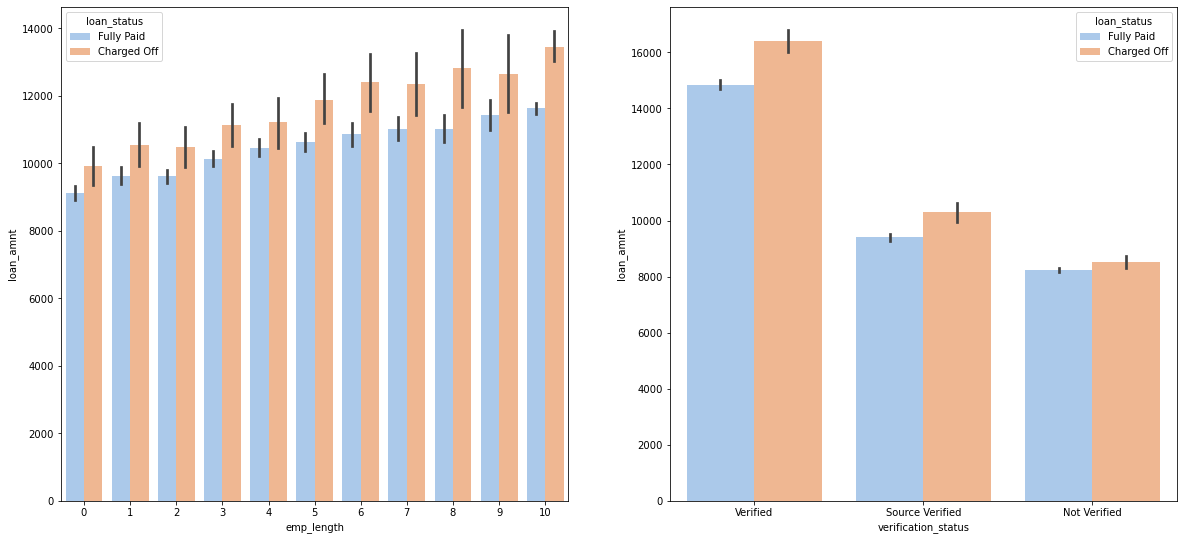

In [146]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

#### Analysis: Defaulters are when employment length is 10yrs and loan amount is 12k-14k and when the loan is verified and loan amount is above 16k

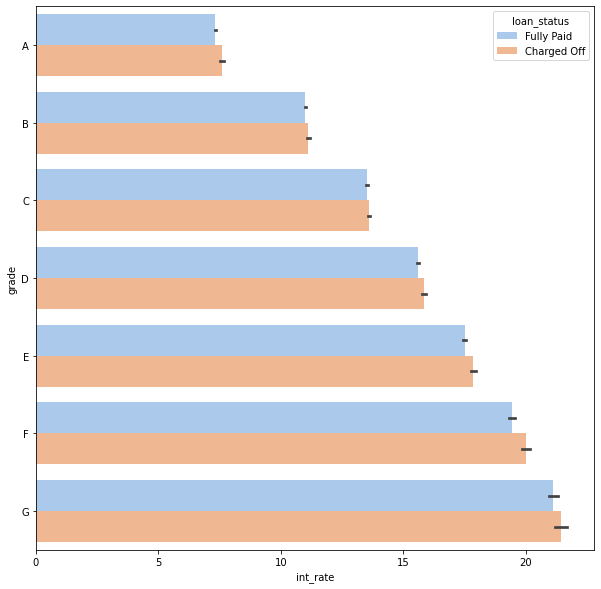

In [147]:
#grade vs interest rate
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

#### Analysis: Defaulters are the applicants in grade G and interest rate above 20%

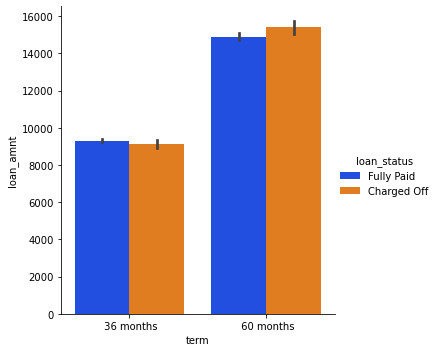

In [148]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

#### Analysis: Applicants who applied and defaulted have no significant difference in loan_amounts. Which means that applicants applying for long term has applied for more loan.

### Observations
#### The above analysis with respect to the charged off loans. There is a more probability of defaulting when :
* Applicants taking loan for 'home improvement' and have income of 60k -70k
* Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
* Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
* Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
* Applicants who have taken a loan for small business and the loan amount is greater than 14k
* Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
* When grade is F and loan amount is between 15k-20k
* When employment length is 10yrs and loan amount is 12k-14k
* When the loan is verified and loan amount is above 16k
* For grade G and interest rate above 20%